In [194]:
import warnings
warnings.filterwarnings('ignore')

In [195]:
import pandas as pd
import numpy as np 
import re

In [196]:
#load the data
metadata = pd.read_csv('all_sources_metadata_2020-03-13.csv')

In [197]:
#print dimension of loaded data
print(metadata.shape)

(29500, 14)


In [198]:
def nan_checker(df):
    
    # Get the variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [200]:
nan_checker(metadata)

,var,proportion,dtype
0,Microsoft Academic Paper ID,0.961559,float64
1,WHO #Covidence,0.958102,object
2,pubmed_id,0.432881,float64
3,sha,0.409492,object
4,has_full_text,0.409492,object
5,license,0.400271,object
6,journal,0.396915,object
7,publish_time,0.381424,object
8,doi,0.106542,object
9,abstract,0.099898,object


In [201]:
# drop the rows where abstract is missing
metadata.dropna(subset = ['abstract'],axis = 0, inplace = True)
#check dimension of new dataset
print(metadata.shape)
metadata.head()

(26553, 14)


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
5,0df0d5270a9399cf4e23c0cdd877a80616a9725e,CZI,An updated estimation of the risk of transmiss...,10.1016/j.idm.2020.02.001,NaN,NaN,cc-by-nc-nd,The basic reproduction number of an infectious...,2020,"Tang, Biao; Bragazzi, Nicola Luigi; Li, Qian; ...",Infectious Disease Modelling,3.006029e+09,#729,True
6,f24242580be243d5fc3f432915d86af6854bb8b7,CZI,Real-time forecasts of the 2019-nCoV epidemic ...,10.1016/j.idm.2020.02.002,NaN,NaN,cc-by-nc-nd,The initial cluster of severe pneumonia cases ...,2020,"Roosa, K.; Lee, Y.; Luo, R.; Kirpich, A.; Roth...",Infectious Disease Modelling,3.006029e+09,#865,True
8,e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1,CZI,COVID-19 outbreak on the Diamond Princess crui...,10.1093/jtm/taaa030,NaN,NaN,cc-by-nc,Cruise ships carry a large number of people in...,2020,"Rocklöv, J.; Sjödin, H.; Wilder-Smith, A.",Journal of Travel Medicine,3.006304e+09,#2926,True


In [202]:
# remove dupicate with same title
metadata.drop_duplicates(subset ="title", keep = False, inplace = True)
print(metadata.shape)
metadata.head()

(20224, 14)


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
6,f24242580be243d5fc3f432915d86af6854bb8b7,CZI,Real-time forecasts of the 2019-nCoV epidemic ...,10.1016/j.idm.2020.02.002,NaN,NaN,cc-by-nc-nd,The initial cluster of severe pneumonia cases ...,2020,"Roosa, K.; Lee, Y.; Luo, R.; Kirpich, A.; Roth...",Infectious Disease Modelling,3.006029e+09,#865,True
8,e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1,CZI,COVID-19 outbreak on the Diamond Princess crui...,10.1093/jtm/taaa030,NaN,NaN,cc-by-nc,Cruise ships carry a large number of people in...,2020,"Rocklöv, J.; Sjödin, H.; Wilder-Smith, A.",Journal of Travel Medicine,3.006304e+09,#2926,True
10,469ed0f00c09e2637351c9735c306f27acf3aace,CZI,First two months of the 2019 Coronavirus Disea...,10.1186/s41256-020-00137-4,NaN,NaN,cc-by,Similar to outbreaks of many other infectious ...,2020,"Chen, Xinguang; Yu, Bin",Global Health Research and Policy,3.006646e+09,#5595,True


In [204]:
# import necessary libraries 
import nltk.data
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruijin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [266]:
#remove numbers and other noise tokens
abstract_token=[]
for i in range(list(metadata.shape)[0]):
    a=metadata['abstract'].iloc[i]
    a=re.sub('[0-9]', '', a)
    a=re.sub('\(', '',a)
    a=re.sub('\)', '',a)
    a=re.sub('\.', '',a)
    a=re.sub('\,', '',a)
    a=re.sub('\;', '',a)
    a=re.sub('\:', '',a)
    a=re.sub('\!', '',a)
    a=re.sub('\?', '',a)
    a=re.sub("\'", '',a)
    a=re.sub('\"', '',a)
    a=re.sub('\/', '',a)
    a=re.sub('&', '',a)
    a=re.sub('--', '',a)
    a=re.sub('-', '',a)
    a=re.sub('%', '',a)
    a=re.sub('·', '',a)
    # tokenize input abstract
    for word in word_tokenize(a):
        if word.lower() not in stop_words:
            abstract_token.append(word) 

In [272]:
abstract_token[0:60]

['geographic',
 'spread',
 'novel',
 'coronavirus',
 'COVID',
 'infections',
 'epicenter',
 'Wuhan',
 'China',
 'provided',
 'opportunity',
 'study',
 'natural',
 'history',
 'recently',
 'emerged',
 'virus',
 'Using',
 'publicly',
 'available',
 'eventdate',
 'data',
 'ongoing',
 'epidemic',
 'present',
 'study',
 'investigated',
 'incubation',
 'period',
 'time',
 'intervals',
 'govern',
 'epidemiological',
 'dynamics',
 'COVID',
 'infections',
 'results',
 'show',
 'incubation',
 'period',
 'falls',
 'within',
 'range',
 'ndash',
 'days',
 'confidence',
 'mean',
 'around',
 'days',
 'approximated',
 'using',
 'bestfit',
 'lognormal',
 'distribution',
 'mean',
 'time',
 'illness',
 'onset',
 'hospital',
 'admission']

In [268]:
metadata['abstract_token'].head()

2     [The, geographic, spread, of, novel, coronavir...
3     [In, December, cases, of, unidentified, pneumo...
6     [The, initial, cluster, of, severe, pneumonia,...
8     [Cruise, ships, carry, a, large, number, of, p...
10    [Similar, to, outbreaks, of, many, other, infe...
Name: abstract_token, dtype: object

In [269]:
metadata.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,abstract_token
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True,"[The, geographic, spread, of, novel, coronavir..."
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True,"[In, December, cases, of, unidentified, pneumo..."
6,f24242580be243d5fc3f432915d86af6854bb8b7,CZI,Real-time forecasts of the 2019-nCoV epidemic ...,10.1016/j.idm.2020.02.002,NaN,NaN,cc-by-nc-nd,The initial cluster of severe pneumonia cases ...,2020,"Roosa, K.; Lee, Y.; Luo, R.; Kirpich, A.; Roth...",Infectious Disease Modelling,3.006029e+09,#865,True,"[The, initial, cluster, of, severe, pneumonia,..."
8,e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1,CZI,COVID-19 outbreak on the Diamond Princess crui...,10.1093/jtm/taaa030,NaN,NaN,cc-by-nc,Cruise ships carry a large number of people in...,2020,"Rocklöv, J.; Sjödin, H.; Wilder-Smith, A.",Journal of Travel Medicine,3.006304e+09,#2926,True,"[Cruise, ships, carry, a, large, number, of, p..."
10,469ed0f00c09e2637351c9735c306f27acf3aace,CZI,First two months of the 2019 Coronavirus Disea...,10.1186/s41256-020-00137-4,NaN,NaN,cc-by,Similar to outbreaks of many other infectious ...,2020,"Chen, Xinguang; Yu, Bin",Global Health Research and Policy,3.006646e+09,#5595,True,"[Similar, to, outbreaks, of, many, other, infe..."


In [270]:
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


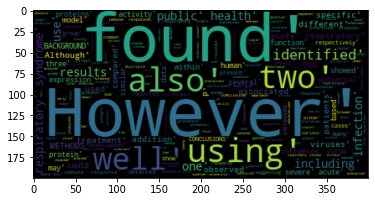

In [273]:
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(str(abstract_token))
plt.imshow(wordcloud, interpolation="bilinear")

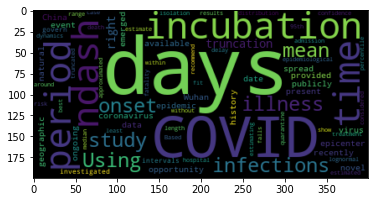

In [278]:
wordcloud = WordCloud().generate(metadata.iloc[0]['abstract'])
plt.imshow(wordcloud, interpolation="bilinear")